In [10]:
import pandas as pd
import numpy as np

file_data = pd.read_csv('./dataset/file_data.csv')
file_data['가격'] = [3000,2500,2000,3500,3000]
file_data

,차림표,가격
0,김밥,3000
1,라면,2500
2,어묵,2000
3,튀김,3500
4,떡볶이,3000


In [11]:
df1 = file_data.copy()
print(df1,type(df1))
df2 = pd.DataFrame({'차림표':['비빔밥','돈까스','닭강정','수육','제육덮밥'],
                   '가격':[6000,8000,6000,9000,9000]})
df2

   차림표    가격
0   김밥  3000
1   라면  2500
2   어묵  2000
3   튀김  3500
4  떡볶이  3000 <class 'pandas.core.frame.DataFrame'>


,차림표,가격
0,비빔밥,6000
1,돈까스,8000
2,닭강정,6000
3,수육,9000
4,제육덮밥,9000


In [12]:
# DataFrame 병합 -세로방향
dfc1 = pd.concat([df1,df2])
dfc1

,차림표,가격
0,김밥,3000
1,라면,2500
2,어묵,2000
3,튀김,3500
4,떡볶이,3000
0,비빔밥,6000
1,돈까스,8000
2,닭강정,6000
3,수육,9000
4,제육덮밥,9000


In [13]:
dfc2 = pd.concat([df1,df2],axis = 1)
dfc2

,차림표,가격,차림표,가격
0,김밥,3000,비빔밥,6000
1,라면,2500,돈까스,8000
2,어묵,2000,닭강정,6000
3,튀김,3500,수육,9000
4,떡볶이,3000,제육덮밥,9000


In [15]:
columns = ['메뉴1','가격1','메뉴2','가격2']
dfc2.columns =columns
dfc2

,메뉴1,가격1,메뉴2,가격2
0,김밥,3000,비빔밥,6000
1,라면,2500,돈까스,8000
2,어묵,2000,닭강정,6000
3,튀김,3500,수육,9000
4,떡볶이,3000,제육덮밥,9000


In [16]:
sr1 = dfc2['메뉴1']
sr2 = dfc2['가격2']
print(sr1,'\n')
print(sr2,'\n')

0     김밥
1     라면
2     어묵
3     튀김
4    떡볶이
Name: 메뉴1, dtype: object 

0    6000
1    8000
2    6000
3    9000
4    9000
Name: 가격2, dtype: int64 



In [17]:
# 시리즈 > 데이터프레임
df = pd.concat([sr1,sr2],axis = 1)
df

,메뉴1,가격2
0,김밥,6000
1,라면,8000
2,어묵,6000
3,튀김,9000
4,떡볶이,9000


In [6]:
#삭제
dfc3 = dfc2.copy()

dfc3.drop('가격1',axis = 1 , inplace = True) #원본에 반영
dfc3

KeyError: "['가격1'] not found in axis"

In [46]:
dfc4 = dfc3.copy()
dfc4.drop(0,axis = 0,inplace = True)
dfc4

,메뉴1,메뉴2,가격2
1,라면,돈까스,8000
2,어묵,닭강정,6000
3,튀김,수육,9000
4,떡볶이,제육덮밥,9000


In [18]:
# 인데싱을 통해 특정 컬럼, 특정 행 , 특정 값을 추출
dfc3 = dfc2.copy()
#컬럼
print(dfc3['메뉴1'])
#행
print(dfc3.loc[0])
# 값
print(dfc3.iloc[1,1])

0     김밥
1     라면
2     어묵
3     튀김
4    떡볶이
Name: 메뉴1, dtype: object
메뉴1      김밥
가격1    3000
메뉴2     비빔밥
가격2    6000
Name: 0, dtype: object
2500


In [22]:
#조건에 맞는 데이터 추출 -불린 인덱싱
#dfc['가격2']>7000

dfc3.loc[dfc3['가격1']>3000,['메뉴1']]

,메뉴1
3,튀김


In [82]:
dfc.loc[5] = ['닭발',6000,'김말이',2000]
dfc

,메뉴1,가격1,메뉴2,가격2
0,김밥,3000,비빔밥,6000
1,라면,2500,돈까스,8000
2,어묵,2000,닭강정,6000
3,튀김,3500,수육,9000
4,떡볶이,3000,제육덮밥,9000
5,닭발,6000,김말이,2000


In [84]:
# 열 추가
dfc['메뉴3'] = ['콜라','사이다','환타','포도주','위스키','소주']
dfc

,메뉴1,가격1,메뉴2,가격2,메뉴3
0,김밥,3000,비빔밥,6000,콜라
1,라면,2500,돈까스,8000,사이다
2,어묵,2000,닭강정,6000,환타
3,튀김,3500,수육,9000,포도주
4,떡볶이,3000,제육덮밥,9000,위스키
5,닭발,6000,김말이,2000,소주


In [89]:
newdf = dfc1.reset_index()
newdf.drop('index',axis = 1,inplace = True)
newdf

,차림표,가격
0,김밥,3000
1,라면,2500
2,어묵,2000
3,튀김,3500
4,떡볶이,3000
5,비빔밥,6000
6,돈까스,8000
7,닭강정,6000
8,수육,9000
9,제육덮밥,9000


In [98]:
new_index = np.arange(0,10)
newdf1 = newdf.reindex(new_index)
newdf1.index = np.arange(1,11)
newdf1

,차림표,가격
1,김밥,3000
2,라면,2500
3,어묵,2000
4,튀김,3500
5,떡볶이,3000
6,비빔밥,6000
7,돈까스,8000
8,닭강정,6000
9,수육,9000
10,제육덮밥,9000


In [99]:
#내림차순 정렬
newdf2 = newdf1.sort_index(ascending = False)
newdf2

,차림표,가격
10,제육덮밥,9000
9,수육,9000
8,닭강정,6000
7,돈까스,8000
6,비빔밥,6000
5,떡볶이,3000
4,튀김,3500
3,어묵,2000
2,라면,2500
1,김밥,3000


In [100]:
newdf3 = newdf2.sort_index(ascending = True)
newdf3

,차림표,가격
1,김밥,3000
2,라면,2500
3,어묵,2000
4,튀김,3500
5,떡볶이,3000
6,비빔밥,6000
7,돈까스,8000
8,닭강정,6000
9,수육,9000
10,제육덮밥,9000


In [103]:
newdf4 = newdf2.sort_values(by=['가격'],ascending = False)
newdf4

,차림표,가격
10,제육덮밥,9000
9,수육,9000
7,돈까스,8000
8,닭강정,6000
6,비빔밥,6000
4,튀김,3500
5,떡볶이,3000
1,김밥,3000
2,라면,2500
3,어묵,2000


In [47]:
!pip install seaborn

In [25]:
import pandas as pd
import numpy as np

data = np.arange(20).reshape(4,5)
df= pd.DataFrame(data,columns = ['a','b','c','d','e'])
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [33]:
# 삭제
df1 = df.copy()
df1.drop(df1.index[[0,3]])


,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14


In [37]:
# 특정 조건에 맞는 인덱스 구하기
df1 = df.copy()
idx = df1[df1.a >10].index
df1.drop(idx)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [47]:
data = np.random.randn(10000).reshape(100,100)
df = pd.DataFrame(data,columns = np.arange(1,101))
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.509004,-0.977443,-0.125640,-0.539894,0.102773,-0.360281,-1.237271,0.172753,0.242151,0.773251,...,-1.310614,0.660750,-0.345924,-0.344640,0.699059,-0.080448,-1.024719,0.968966,-0.158800,0.705625
1,-0.056202,0.317329,0.371304,-0.114530,-0.406239,-0.288081,-0.693251,-1.111562,-0.480411,-0.474740,...,-0.566670,-0.711874,0.333701,0.903837,0.527201,0.595205,-1.594525,0.129346,-0.915509,1.122264
2,0.733869,-1.088246,-1.144065,0.763498,0.845279,-1.543460,1.074564,1.433736,0.102424,0.279877,...,-1.494106,-0.772312,1.104940,-1.096037,0.914037,-0.637771,0.008063,-0.677559,-1.255891,-0.317311
3,0.715636,-0.176562,0.472718,0.623022,1.401526,-1.367446,2.542793,-1.286190,0.722507,-0.318765,...,-0.312008,-0.388183,0.679813,0.225069,2.203206,0.720669,0.589635,0.928025,-1.423072,0.189193
4,-0.775835,0.884489,-0.209675,-0.608325,-0.707531,0.594251,0.116529,0.006284,0.358641,-0.462904,...,-0.543262,0.448957,-0.235982,-1.090818,1.382868,-0.976570,-1.172424,0.860428,1.573425,-0.325612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.510552,-0.768590,1.031988,-0.080785,0.685695,-0.271342,-0.076870,0.420805,2.067665,1.046141,...,-2.187353,-0.231321,-0.372617,0.159039,0.006269,0.418785,-1.107599,-0.346000,-0.589008,1.049987
96,1.764197,-1.102945,-0.821011,0.382891,-1.127532,0.489544,0.146791,0.241405,-0.791884,-1.405011,...,1.121835,-0.300100,-0.609372,0.485843,-0.612609,0.378546,-0.701364,-1.357392,-0.309248,-0.964047
97,2.163981,1.698691,0.677830,-0.487435,0.030384,0.349285,2.392093,0.697367,0.106762,-1.562195,...,0.115899,-2.323939,-0.983467,-1.221560,-0.775615,0.143155,0.035255,1.810604,0.148797,0.987442
98,1.172274,1.887090,0.749686,1.144494,-1.646765,0.677016,-0.533641,-1.058199,-0.131022,1.153816,...,-0.980709,0.886916,0.587978,0.255416,-1.308716,-1.045332,0.537156,-2.058992,0.841218,2.530045


In [55]:
li = []
for i in range(100):
    li.append('c'+str(i+1))
print(li)

data = np.random.randn(10000).reshape(100,100)
df = pd.DataFrame(data,columns = li)
df

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100']


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-1.764726,0.017279,0.115350,-1.229910,-0.967781,0.403952,-0.813879,-0.936379,-1.653802,0.801432,...,0.870973,0.127606,-1.865832,0.306609,0.968680,1.154666,0.721020,-0.976854,0.642076,-0.984448
1,1.909204,-0.113840,-0.992589,1.033349,1.946147,0.377447,-0.886597,0.607885,0.760193,-1.384845,...,1.768815,0.294929,0.505487,-0.592429,1.567944,-0.394207,-0.375997,-1.542775,2.148628,-1.152028
2,-0.140240,0.746734,1.731858,-0.557945,0.872939,0.374202,1.879156,-0.373662,-1.227991,-0.358392,...,-3.067645,1.070223,0.008977,0.188349,0.130536,0.646801,1.197511,0.215772,-0.981907,-1.246166
3,1.379126,-1.903783,0.230456,-0.977792,-0.810154,0.237992,0.575883,-1.124603,-1.191288,-1.478949,...,0.960111,-1.273532,0.594984,1.628038,-1.292404,-0.952708,-1.036265,-0.394776,0.266543,3.628626
4,-1.385617,-0.624564,1.115053,0.442455,1.788992,-1.094590,0.734659,0.656661,-0.466363,-2.429149,...,0.772384,-1.945136,-1.020949,0.555934,0.153662,-0.696964,-0.233627,-1.819771,-0.106250,-0.033270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.857393,-0.012671,-0.705194,1.038822,-1.027836,-1.032191,-0.253666,0.678153,-0.074960,-0.453092,...,0.187136,-0.676607,0.000859,-1.146438,1.358459,-0.752299,-0.941453,-1.664329,0.123087,-0.388524
96,0.022828,1.204538,-0.398058,-0.367365,-0.582635,-0.792171,0.208574,0.228807,-0.753957,1.603301,...,-1.076164,0.061773,0.968293,0.746338,0.248447,0.171509,0.410774,0.792632,-1.485616,1.081789
97,-0.023879,2.144937,0.120217,1.988715,-0.324694,-1.222743,-1.010133,-1.547908,-0.254458,0.336808,...,-0.059009,-0.114620,0.229650,1.588164,0.433200,-0.287664,1.041596,0.338609,-1.494704,-0.894096
98,-0.764587,-0.138957,0.093487,1.213357,0.952756,0.409901,-0.011226,0.159525,2.384945,-1.462165,...,-0.445242,-1.006701,1.858948,-0.832619,-0.939898,0.398364,-1.261695,1.171728,-0.477047,-0.073535


In [59]:
df1 = df.copy()
df1['c2'] = df1.c2 *100
df.iloc[1] = df.iloc[1]*100
idx = df1[df1.c2>10].index
print(idx)

Int64Index([ 2,  5,  8, 13, 16, 17, 19, 23, 25, 26, 28, 29, 30, 36, 40, 42, 46,
            48, 49, 57, 58, 65, 68, 70, 71, 72, 75, 76, 78, 81, 84, 85, 86, 87,
            88, 93, 94, 96, 97, 99],
           dtype='int64')


In [60]:
df1.drop(idx)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-1.764726,1.727919,0.115350,-1.229910,-0.967781,0.403952,-0.813879,-0.936379,-1.653802,0.801432,...,0.870973,0.127606,-1.865832,0.306609,0.968680,1.154666,0.721020,-0.976854,0.642076,-0.984448
1,1.909204,-11.384024,-0.992589,1.033349,1.946147,0.377447,-0.886597,0.607885,0.760193,-1.384845,...,1.768815,0.294929,0.505487,-0.592429,1.567944,-0.394207,-0.375997,-1.542775,2.148628,-1.152028
3,1.379126,-190.378304,0.230456,-0.977792,-0.810154,0.237992,0.575883,-1.124603,-1.191288,-1.478949,...,0.960111,-1.273532,0.594984,1.628038,-1.292404,-0.952708,-1.036265,-0.394776,0.266543,3.628626
4,-1.385617,-62.456448,1.115053,0.442455,1.788992,-1.094590,0.734659,0.656661,-0.466363,-2.429149,...,0.772384,-1.945136,-1.020949,0.555934,0.153662,-0.696964,-0.233627,-1.819771,-0.106250,-0.033270
6,0.843034,-154.843142,-0.257970,0.119811,-0.650635,-0.003952,-1.099485,-1.974104,-0.359664,-0.714760,...,-0.569102,0.821128,0.466015,0.965526,-0.154000,2.362235,0.474872,0.683782,0.581168,-0.445323
7,-0.356957,-17.598916,0.026781,1.417323,2.419289,0.872005,-1.535362,-0.525565,-1.065411,1.431066,...,0.744319,-0.662745,0.385076,0.927602,0.943472,1.330009,0.201292,-0.581562,-0.818947,-1.259525
9,0.189575,-67.425968,0.086185,0.311819,0.472955,0.535031,1.517843,-0.644053,0.125839,-0.920546,...,1.127292,-0.859480,-0.971592,-0.163964,0.400315,-0.080096,1.120523,-1.313094,-0.164364,0.326749
10,0.301845,9.709549,-0.972727,0.263393,0.363605,0.707747,-1.377480,-1.258826,-2.220500,-1.091758,...,-0.807868,0.663785,0.342454,0.316611,-0.318199,0.112157,0.608396,-0.028657,-2.057687,0.363710
11,0.145956,-31.049010,-1.222380,-0.908281,-0.630924,2.230295,1.142344,1.793612,1.568553,-0.533912,...,-0.221855,-0.266780,-2.263597,1.838650,1.220983,-1.075714,0.370885,-0.885955,-0.344053,0.077447
12,0.488677,-33.775188,-0.477890,0.610448,0.695302,-0.455832,-0.286477,-0.907306,1.020880,1.407745,...,-0.870181,0.017167,-0.181848,0.169404,0.470649,1.472461,-0.032022,-0.983497,-1.438984,-1.319610


In [62]:
df1 = df.copy()
df1['c2'] = df1.c2 *100
df.iloc[1] = df.iloc[1]*100
idx = df1.query('c2 > 10').index
print(idx)

Int64Index([ 2,  5,  8, 13, 16, 17, 19, 23, 25, 26, 28, 29, 30, 36, 40, 42, 46,
            48, 49, 57, 58, 65, 68, 70, 71, 72, 75, 76, 78, 81, 84, 85, 86, 87,
            88, 93, 94, 96, 97, 99],
           dtype='int64')


In [64]:
df1 = df.copy()
df1['c2'] = df1.c2 *100
df.iloc[1] = df.iloc[1]*100
cond1 = df1.c2>10
cond2 = df1.c3 > 0
cond3 = df1.c4 < 0
df2 = df1[cond1 & cond2 & cond3]
print(df2.shape)
df2

(15, 100)


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
2,-0.140240,74.673383,1.731858,-0.557945,0.872939,0.374202,1.879156,-0.373662,-1.227991,-0.358392,...,-3.067645,1.070223,0.008977,0.188349,0.130536,0.646801,1.197511,0.215772,-0.981907,-1.246166
16,0.069912,155.630150,1.189983,-0.450958,0.354696,-1.663155,0.874562,0.117908,-1.117370,1.577576,...,-0.243240,0.714574,1.479753,0.374279,-0.802066,2.513721,0.216440,-0.452249,-2.015233,1.859004
17,0.145664,75.696950,0.246397,-0.028383,0.178545,0.921178,0.236304,2.067649,-0.496284,-0.936657,...,0.775782,0.160743,1.535184,0.216164,-0.705496,0.101167,0.315241,-0.299860,0.621941,-1.308427
25,-0.714705,35.490851,1.377608,-1.306275,1.942909,0.503595,1.010886,-0.692007,-0.170176,0.362054,...,0.676101,1.474044,-0.407466,-0.719257,-1.433609,1.764286,-1.220497,0.703968,-1.570262,-1.623473
29,0.148569,19.183087,0.251377,-1.498155,-0.432108,0.470766,-0.489314,1.741318,1.211399,0.545514,...,-0.020679,-0.704223,0.368016,-0.537760,0.144416,-0.286362,-0.451134,-2.343113,0.440104,0.208289
40,-1.244555,10.238369,1.013610,-0.548247,-1.264047,0.894274,-0.618576,-0.164185,-1.020086,-1.982977,...,-0.721721,-0.296631,-0.073889,-0.009552,-2.943848,0.499151,1.606738,0.111559,0.333945,0.433906
46,-0.194645,28.985014,1.316677,-1.202648,-0.045470,1.201206,0.241401,1.138953,0.846164,-0.441318,...,-0.769558,0.514519,-0.131861,1.521243,0.860721,1.381292,0.871258,-0.200159,-0.984534,-0.538939
48,1.005728,61.164601,1.432397,-0.342767,-0.506431,-0.489153,0.016212,0.340609,0.282103,-0.286641,...,-1.003080,1.894884,-0.379241,0.374130,1.068747,-1.920201,0.462454,-1.596613,1.424262,-1.009849
58,-0.469078,14.981961,1.308570,-1.494728,1.409543,-0.763622,1.054527,1.976248,-2.061473,0.342804,...,-0.000802,-0.081613,-0.621156,0.087154,-1.267946,0.540490,-1.899422,-1.441403,0.175196,0.568528
68,-0.956507,13.173007,0.304002,-0.213957,-0.687441,0.624479,-2.360465,0.343599,-0.567015,-0.421684,...,-0.053206,-0.269744,-1.249300,0.958434,-0.020395,0.487587,0.988632,-1.739091,-0.282885,0.088207


In [65]:
df3 = df1[cond1|cond2|cond3]
df3.shape

(84, 100)

In [66]:
df1[cond1][['c1','c2']].head()

,c1,c2
2,-0.140240,74.673383
5,-0.118859,32.891542
8,-1.014540,147.715837
13,-0.977008,191.198875
16,0.069912,155.630150


In [67]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
#칼럼 이름 변경
tdf.rename(columns = {'sex':'gender','fare':'ticket'},inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [71]:
tdf.gender.value_counts()

male      577
female    314
Name: gender, dtype: int64

In [72]:
tdf.gender.unique()

array(['male', 'female'], dtype=object)

In [73]:
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

0    577
1    314
Name: gender, dtype: int64

In [74]:
#칼럼 대문자 변경

tdf.rename(str.upper,axis = 'columns', inplace = True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [75]:
tdf.rename(str.lower,axis = 'columns', inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
#컬럼 순서 변경

columns_customed = ['pclass','gender','age','survived']
tdf[columns_customed].head()

,pclass,gender,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [80]:
# NaN으로 변경

df1 = df.copy()
df1['sex'] = df1.sex.replace('male',np.nan)
df1.sex.value_counts()

female    314
Name: sex, dtype: int64

In [82]:
tdf.info()
# category : 범주
# object : 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [83]:
tdf.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [85]:
tdf.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [86]:
tdf.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [87]:
tdf.value_counts('deck')

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
dtype: int64

In [95]:
#결측값 대체 : age 평균값으로 대체
tdf = df.copy()
print(tdf.age.isnull().sum(),'\n')
tdf.age.fillna(tdf.age.mean(),inplace=True)
tdf.age.isnull().sum()

177 



0

In [94]:
tdf1 = df.copy()
tdf1.age.replace(np.nan,tdf1.age.mean(), inplace = True)
tdf1.age.isnull().sum()

0

In [96]:
# 결측값 삭제
tdf2 = df.copy()
tdf2.dropna(subset = ['age'],inplace = True)
print(len(tdf2),'\n')
tdf2.age.isnull().sum()

714 



0

In [102]:
tdf[['age','fare']]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [100]:
# 실수를 정수로 변환하여 출력
tdf[['age','fare']].head().astype(int)

,age,fare
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [105]:
tdf1 = tdf[['age','fare']].astype({'age':'int','fare':'int'})
tdf1.head()

,age,fare
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [106]:
# age 칼럼의 값 구성 체크
tdf.age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

In [107]:
#age 칼럼의 고유 구성 요소
tdf.age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [114]:
# age 칼럼의 범주화
def get_category(age):
    cat = ''
    if age <= 6: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 19: cat = 'Teen'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat
tdf['age_cat'] = tdf.age.apply(lambda x:get_category(x))
tdf[['age','age_cat']].head(20).round(0)

,age,age_cat
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
5,30.0,Young Adult
6,54.0,Adult
7,2.0,Baby
8,27.0,Young Adult
9,14.0,Teen


In [116]:
# 인코딩 scikit learn
tdf = df.copy()
df1 = tdf[['sex','class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [117]:
!pip install scikit-learn

In [123]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

le = LabelEncoder()
features = ['sex','class']
for feature in features:
    df1[feature] = le.fit_transform(df1[feature])
    #준비와 실행 한번에 
df1.head(10)

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2
5,1,2
6,1,0
7,1,2
8,0,2
9,0,1


In [128]:
from sklearn.preprocessing import OneHotEncoder

tdf = df.copy()
df1 = tdf[['sex','class']]


items = list(df1.sex)
encoder = LabelEncoder()
encoder.fit(items) #준비 단계만
labels = encoder.transform(items)
labels = labels.reshape(-1,1)
oh_encoder=OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(oh_labels.toarray(),oh_labels.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] (891, 2)


In [129]:
pd.get_dummies(df1).head()


,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [131]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [135]:
df_org = pd.DataFrame(boston.data,columns=[boston.feature_names])
df_org['target'] = boston.target
df_org

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [136]:
df = df_org[['INDUS','RM','PTRATIO','LSTAT','target']]
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,6.575,15.3,4.98,24.0
1,7.07,6.421,17.8,9.14,21.6
2,7.07,7.185,17.8,4.03,34.7
3,2.18,6.998,18.7,2.94,33.4
4,2.18,7.147,18.7,5.33,36.2


In [141]:
# 스케일링(0~1사이 값으로 변경)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['RM'] = scaler.fit_transform(df.RM)
df['INDUS'] = scaler.fit_transform(df.INDUS)
df['target'] = scaler.fit_transform(df.target)
df

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,15.3,4.98,0.422222
1,0.242302,0.547998,17.8,9.14,0.368889
2,0.242302,0.694386,17.8,4.03,0.660000
3,0.063050,0.658555,18.7,2.94,0.631111
4,0.063050,0.687105,18.7,5.33,0.693333
...,...,...,...,...,...
501,0.420455,0.580954,21.0,9.67,0.386667
502,0.420455,0.490324,21.0,9.08,0.346667
503,0.420455,0.654340,21.0,5.64,0.420000
504,0.420455,0.619467,21.0,6.48,0.377778


In [ ]:
#스탠다드 스케일러

In [144]:
li = ['INDUS','RM','PTRATIO','LSTAT','target']
scaler= MinMaxScaler()

for i in li:
    df[i] = scaler.fit_transform(df[i])
    
df
    

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333
...,...,...,...,...,...
501,0.420455,0.580954,0.893617,0.219095,0.386667
502,0.420455,0.490324,0.893617,0.202815,0.346667
503,0.420455,0.654340,0.893617,0.107892,0.420000
504,0.420455,0.619467,0.893617,0.131071,0.377778


In [146]:
#상관관계(-1,1)
df.corr()

,INDUS,RM,PTRATIO,LSTAT,target
INDUS,1.000000,-0.391676,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.383248,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.374044,1.000000,-0.737663
target,-0.483725,0.695360,-0.507787,-0.737663,1.000000


In [147]:
!pip install matplotlib

<AxesSubplot:xlabel='None', ylabel='None'>

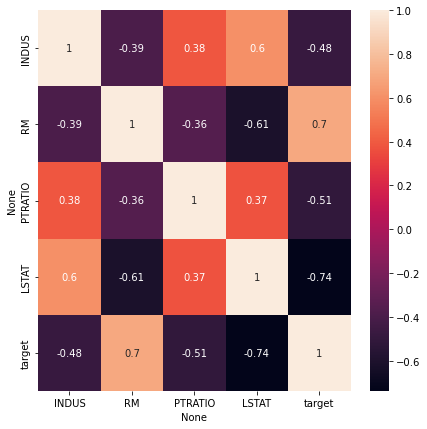

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='Density'>

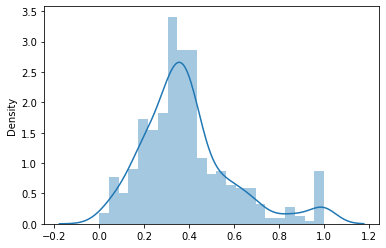

In [149]:
sns.distplot(df[['target']])

<AxesSubplot:ylabel='Density'>

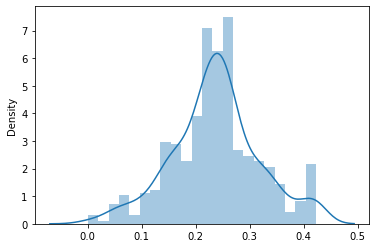

In [152]:
# 로그 변환
import numpy as np
df['target'] = np.log1p(df.target)
sns.distplot(df.target)

In [154]:
# 로그 변환 환원
df['target'] = np.expm1(df.target)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.352221
1,0.242302,0.547998,0.553191,0.204470,0.313999
2,0.242302,0.694386,0.553191,0.063466,0.506818
3,0.063050,0.658555,0.648936,0.033389,0.489261
4,0.063050,0.687105,0.648936,0.099338,0.526699


In [165]:
# 결합
data1= np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)

df1 = pd.DataFrame(data1,columns=['a','b','c','d','e'])
df2 = pd.DataFrame(data2,columns=['d','e','h','i'])
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [166]:
#행방향 결합
pd.concat([df1,df2],axis = 0)

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [167]:
#열방향 결합
pd.concat([df1,df2],axis = 1)

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [170]:
pd.concat([df1,df2],axis = 0,ignore_index=True)
# 기존 데이터프레임의 인덱스를 무시하고 병합

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [172]:
#join, merge(특정 조건)

df1.join(df2,lsuffix='_a',rsuffix='_b',how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [175]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_a',rsuffix='_b')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


In [178]:
pd.merge(df1,df2,on='ind')

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [12]:
# pandas 파일 읽고 저장
# csv 파일 읽고 저장
import numpy as np
import pandas as pd

ar1 = np.arange(10)
li1 = ar1.reshape(2,5)
df = pd.DataFrame(li1,columns = ['c0','c1','c2','c3','c4'])
#df.to_csv('./dataset/read_csv_sample.csv',index=False)
df.to_csv('./dataset/read_csv_sample.csv')

In [15]:
df1 = pd.read_csv('./dataset/read_csv_sample.csv',index_col = 0)
df1

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [18]:
#header = None 옵션(데이터 셋에 헤더가 없는 경우)
df2 = pd.read_csv('./dataset/read_csv_sample.csv',header = None)
df2

,0,1,2,3,4,5
0,NaN,c0,c1,c2,c3,c4
1,0.0,0,1,2,3,4
2,1.0,5,6,7,8,9


In [20]:
# json 파일 읽고 쓰기

df1.to_json('./dataset/df_j.json')
df_j = pd.read_json('./dataset/df_j.json')
df_j

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [22]:
#바이너리 파일로 읽고 쓰기 pickle
import pickle

df1.to_pickle('./dataset/df2.pkl')

df2 = pd.read_pickle('./dataset/df2.pkl')
df2

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [23]:
# 파이썬 외장함수 pickle
import pickle
f =  open('./dataset/test.txt','wb')
data = {1:'python',2:'you need'}
pickle.dump(data,f)
f.close()

In [24]:
f = open('./dataset/test.txt','rb')
data = pickle.load(f)
print(data)
f.close()

{1: 'python', 2: 'you need'}


In [26]:
!pip install openpyxl

In [27]:
#엑셀 파일
df_ex = pd.read_excel('./dataset/auto-mpg.xlsx')
df_ex.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
df_ex.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [31]:
df_ex1 = df_ex[['mpg','cylinders','horsepower','weight']]
df_ex1.to_excel('./dataset/auto-mpg_ex1.xlsx',index = False)
df_ex1 = pd.read_excel('./dataset/auto-mpg_ex1.xlsx')
df_ex1.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


연산
- 행/열 인덱스를 기준으로 모든 원소를 정렬한다
- 동일한 위치에 있는 원소끼리 일대일 대응시킨다.
- 일대일 대응이 되는 원소끼리 연산을 처리한다.

In [36]:
st1 = pd.Series({'국어':100,'영어':80,'수학':90})
st2 = pd.Series({'수학':80,'국어':90,'영어':80})

add = st1+st2
sub = st1 - st2
mul = st1*st2
div = round((st1/st2),2)
print(type(add))
df = pd.concat([add,sub,mul,div],axis = 1)
df

<class 'pandas.core.series.Series'>


,0,1,2,3
국어,190,10,9000,1.11
수학,170,10,7200,1.12
영어,160,0,6400,1.00


In [39]:
result = pd.DataFrame([add,sub,mul,div],index = ['덧셈','뺄셈','곱셈','나눗셈'])
result
#딕셔너리의 키 밸류가 칼럼으로 변환되어 출력

,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


In [40]:
li = list('abcdefg')
li

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [42]:
df1 = pd.DataFrame(np.arange(12).reshape(3,4),columns =list('abcd'))
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [43]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4),columns = list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4,5),columns = list('abcde'))

df2.loc[1,'b'] = np.nan
print(df1,'\n')
print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0 

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [44]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [45]:
df1.add(df2)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [60]:
df1.add(df2,fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [56]:
# sub(), mul(), div()을 사용하여 df2의 Nan 값을 0으로 대체하여 연산을 수행하세요

dfr = df1.sub(df2)
dfr = dfr.replace(np.nan,0)
dfr

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,0.0
1,-1.0,0.0,-1.0,-1.0,0.0
2,-2.0,-2.0,-2.0,-2.0,0.0
3,0.0,0.0,0.0,0.0,0.0


In [58]:
dfr = df1.mul(df2)
dfr = dfr.replace(np.nan,0)
dfr

,a,b,c,d,e
0,0.0,1.0,4.0,9.0,0.0
1,20.0,0.0,42.0,56.0,0.0
2,80.0,99.0,120.0,143.0,0.0
3,0.0,0.0,0.0,0.0,0.0


In [57]:
dfr = df1.div(df2)
dfr = dfr.replace(np.nan,0)
dfr

,a,b,c,d,e
0,0.0,1.000000,1.000000,1.000000,0.0
1,0.8,0.000000,0.857143,0.875000,0.0
2,0.8,0.818182,0.833333,0.846154,0.0
3,0.0,0.000000,0.000000,0.000000,0.0


In [61]:
# reindex의 경우 fill_value 지정

df1.reindex(columns=df2.columns,fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [62]:
# DataFrame 과 Series간 연산
df = pd.DataFrame(np.arange(12.).reshape(4,3),index= ['Utah','Ohio','Texas','Oregan'],columns = list('bde'))
sr = df.iloc[0]
sr


b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [64]:
df

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregan,9.0,10.0,11.0


In [63]:
df-sr

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregan,9.0,9.0,9.0
